In [316]:
#импорт библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

In [317]:
#чтение датасета (csv файла)
data = pd.read_csv('/content/drive/MyDrive/ColabDiplom/LifeExpectancyData.csv')

# Attribute description


"Country": "Country",  
"Year": "Year",  
"Status": "Developed or Developing status",  
"Life expectancy": "Life Expectancy in age",  
"Adult Mortality": "dult Mortality Rates of both sexes (probability of dying between 15 and 60 years per 1000 population)",  
"infant deaths": "Number of Infant Deaths per 1000 population",  
"Alcohol": "Alcohol, recorded per capita (15+) consumption (in litres of pure alcohol)",  
"percentage expenditure": "Expenditure on health as a percentage of Gross Domestic Product per capita(%)",  
"Hepatitis B": "Hepatitis B (HepB) immunization coverage among 1-year-olds (%)",
"Measles": "Measles - number of reported cases per 1000 population",  
"BMI": "Average Body Mass Index of entire population",  
"under-five deaths": "Number of under-five deaths per 1000 population",  
"Polio": "Polio (Pol3) immunization coverage among 1-year-olds (%)",  
"Total expenditure": "General government expenditure on health as a percentage of total government expenditure (%)",  
"Diphtheria": "Diphtheria tetanus toxoid and pertussis (DTP3) immunization coverage among 1-year-olds (%)",  
"HIV/AIDS": "Deaths per 1 000 live births HIV/AIDS (0-4 years)",  
"GDP": "Gross Domestic Product per capita (in USD)",  
"Population": "Population of the country",  
"thinness  1-19 years": "Prevalence of thinness among children and adolescents for Age 10 to 19 (% )",  
"thinness 5-9 years": "Prevalence of thinness among children for Age 5 to 9(%)",  
"Income composition of resources": "Human Development Index in terms of income composition of resources (index ranging from 0 to 1)",  
"Schooling": "Number of years of Schooling(years)"

---

«Страна»: «Страна»,  
«Год»: «Год»,  
«Статус»: «Развитый или Развивающийся статус»,  
«Продолжительность жизни»: «Продолжительность жизни в возрасте»,  
«Смертность взрослых»: «Уровни смертности взрослых обоих полов (вероятность смерти от 15 до 60 лет на 1000 населения)»,  
«младенческая смертность»: «Количество младенческих смертей на 1000 населения»,  
«Алкоголь»: «Учтенное потребление алкоголя на душу населения (15+) (в литрах чистого спирта)»,  
"процентные расходы": "Расходы на здравоохранение в процентах от валового внутреннего продукта на душу населения (%)",  
«Гепатит B»: «Охват иммунизацией против гепатита B (HepB) детей в возрасте 1 года (%)»,  
«Корь»: «Корь - количество зарегистрированных случаев на 1000 населения»,
«ИМТ»: «Средний индекс массы тела всего населения»,  
«Смерть детей в возрасте до пяти лет»: «Число смертей детей в возрасте до пяти лет на 1000 населения»,  
«Полиомиелит»: «Охват иммунизацией против полиомиелита (Pol3) детей в возрасте 1 года (%)»,  
«Общие расходы»: «Общие государственные расходы на здравоохранение в процентах от общих государственных расходов (%)»,  
«Дифтерия»: «Охват иммунизацией дифтерийно-столбнячным анатоксином и коклюшем (АКДС-3) детей в возрасте 1 года (%)»,  
«ВИЧ/СПИД»: «Смертность на 1 000 живорожденных ВИЧ/СПИД (0–4 года)»,  
«ВВП»: «Валовой внутренний продукт на душу населения (в долларах США)»,  
«Население»: «Население страны»,  
«худоба 1–19 лет»: «Распространенность худобы среди детей и подростков в возрасте от 10 до 19 лет (%)»,  
«худоба 5-9 лет»: «Распространенность худобы среди детей в возрасте от 5 до 9 лет (%)»,  
«Доходная структура ресурсов»: «Индекс человеческого развития по доходной структуре ресурсов (индекс от 0 до 1)»,  
«Обучение»: «Количество лет обучения (лет)»

# Describe

In [318]:
#смотрим первые строки датасета
data.head()

Country  Year      Status  Life expectancy   Adult Mortality  \
0  Afghanistan  2015  Developing              65.0            263.0   
1  Afghanistan  2014  Developing              59.9            271.0   
2  Afghanistan  2013  Developing              59.9            268.0   
3  Afghanistan  2012  Developing              59.5            272.0   
4  Afghanistan  2011  Developing              59.2            275.0   

   infant deaths  Alcohol  percentage expenditure  Hepatitis B  Measles   ...  \
0             62     0.01               71.279624         65.0      1154  ...   
1             64     0.01               73.523582         62.0       492  ...   
2             66     0.01               73.219243         64.0       430  ...   
3             69     0.01               78.184215         67.0      2787  ...   
4             71     0.01                7.097109         68.0      3013  ...   

   Polio  Total expenditure  Diphtheria    HIV/AIDS         GDP  Population  \
0    6.0               8.16         65.0        0.1  584.259210  33736494.0   
1   58.0               8.18         62.0        0.1  612.696514    327582.0   
2   62.0               8.13         64.0        0.1  631.744976  31731688.0   
3   67.0               8.52         67.0        0.1  669.959000   3696958.0   
4   68.0               7.87         68.0        0.1   63.537231   2978599.0   

    thinness  1-19 years   thinness 5-9 years  \
0                   17.2                 17.3   
1                   17.5                 17.5   
2                   17.7                 17.7   
3                   17.9                 18.0   
4                   18.2                 18.2   

   Income composition of resources  Schooling  
0                            0.479       10.1  
1                            0.476       10.0  
2                            0.470        9.9  
3                            0.463        9.8  
4                            0.454        9.5  

[5 rows x 22 columns]

In [319]:
#смотрим информацию по колонкам, главное что здесь интересует это кол-во не нулевых значений и тип данных
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [320]:
# проверяем на дубликаты
data.duplicated().any()

False

In [321]:
# смотрим основные статистические характеристики
data.describe()

Year  Life expectancy   Adult Mortality  infant deaths  \
count  2938.000000       2928.000000      2928.000000    2938.000000   
mean   2007.518720         69.224932       164.796448      30.303948   
std       4.613841          9.523867       124.292079     117.926501   
min    2000.000000         36.300000         1.000000       0.000000   
25%    2004.000000         63.100000        74.000000       0.000000   
50%    2008.000000         72.100000       144.000000       3.000000   
75%    2012.000000         75.700000       228.000000      22.000000   
max    2015.000000         89.000000       723.000000    1800.000000   

           Alcohol  percentage expenditure  Hepatitis B       Measles   \
count  2744.000000             2938.000000  2385.000000    2938.000000   
mean      4.602861              738.251295    80.940461    2419.592240   
std       4.052413             1987.914858    25.070016   11467.272489   
min       0.010000                0.000000     1.000000       0.000000   
25%       0.877500                4.685343    77.000000       0.000000   
50%       3.755000               64.912906    92.000000      17.000000   
75%       7.702500              441.534144    97.000000     360.250000   
max      17.870000            19479.911610    99.000000  212183.000000   

              BMI   under-five deaths         Polio  Total expenditure  \
count  2904.000000         2938.000000  2919.000000         2712.00000   
mean     38.321247           42.035739    82.550188            5.93819   
std      20.044034          160.445548    23.428046            2.49832   
min       1.000000            0.000000     3.000000            0.37000   
25%      19.300000            0.000000    78.000000            4.26000   
50%      43.500000            4.000000    93.000000            5.75500   
75%      56.200000           28.000000    97.000000            7.49250   
max      87.300000         2500.000000    99.000000           17.60000   

       Diphtheria      HIV/AIDS            GDP    Population  \
count  2919.000000  2938.000000    2490.000000  2.286000e+03   
mean     82.324084     1.742103    7483.158469  1.275338e+07   
std      23.716912     5.077785   14270.169342  6.101210e+07   
min       2.000000     0.100000       1.681350  3.400000e+01   
25%      78.000000     0.100000     463.935626  1.957932e+05   
50%      93.000000     0.100000    1766.947595  1.386542e+06   
75%      97.000000     0.800000    5910.806335  7.420359e+06   
max      99.000000    50.600000  119172.741800  1.293859e+09   

        thinness  1-19 years   thinness 5-9 years  \
count            2904.000000          2904.000000   
mean                4.839704             4.870317   
std                 4.420195             4.508882   
min                 0.100000             0.100000   
25%                 1.600000             1.500000   
50%                 3.300000             3.300000   
75%                 7.200000             7.200000   
max                27.700000            28.600000   

       Income composition of resources    Schooling  
count                      2771.000000  2775.000000  
mean                          0.627551    11.992793  
std                           0.210904     3.358920  
min                           0.000000     0.000000  
25%                           0.493000    10.100000  
50%                           0.677000    12.300000  
75%                           0.779000    14.300000  
max                           0.948000    20.700000

In [322]:
# Приводим название колонок к нормальному виду удаляя пробелы
data.rename(columns={'Life expectancy ': 'Life expectancy'}, inplace=True)
data.rename(columns={'Measles ': 'Measles'}, inplace=True)
data.rename(columns={' BMI ': 'BMI'}, inplace=True)
data.rename(columns={'under-five deaths ': 'under-five deaths'}, inplace=True)
data.rename(columns={'Diphtheria ': 'Diphtheria'}, inplace=True)
data.rename(columns={' HIV/AIDS': 'HIV/AIDS'}, inplace=True)
data.rename(columns={' thinness  1-19 years': 'thinness 1-19 years'}, inplace=True)
data.rename(columns={' thinness 5-9 years': 'thinness 5-9 years'}, inplace=True)

In [323]:
#проверяем, теперь все отлично
for column in data.columns:
    print(f"'{column}'")

'Country'
'Year'
'Status'
'Life expectancy'
'Adult Mortality'
'infant deaths'
'Alcohol'
'percentage expenditure'
'Hepatitis B'
'Measles'
'BMI'
'under-five deaths'
'Polio'
'Total expenditure'
'Diphtheria'
'HIV/AIDS'
'GDP'
'Population'
'thinness 1-19 years'
'thinness 5-9 years'
'Income composition of resources'
'Schooling'


In [324]:
# выводим количество строк и столбцов
print("Number of Rows:", data.shape[0])
print("Number of Columns:", data.shape[1])

Number of Rows: 2938
Number of Columns: 22


In [325]:
# смотрим где и сколько пропущенных значений
data.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
BMI                                 34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
HIV/AIDS                             0
GDP                                448
Population                         652
thinness 1-19 years                 34
thinness 5-9 years                  34
Income composition of resources    167
Schooling                          163
dtype: int64

In [326]:
# обрабатываем пропущенные значения, заполняя пропуски средним значением по каждому столбцу
imputer = SimpleImputer(missing_values=np.nan, strategy='mean', fill_value=None)
data['Life expectancy']=imputer.fit_transform(data[['Life expectancy']])
data['Adult Mortality']=imputer.fit_transform(data[['Adult Mortality']])
data['Alcohol']=imputer.fit_transform(data[['Alcohol']])
data['Hepatitis B']=imputer.fit_transform(data[['Hepatitis B']])
data['BMI']=imputer.fit_transform(data[['BMI']])
data['Polio']=imputer.fit_transform(data[['Polio']])
data['Total expenditure']=imputer.fit_transform(data[['Total expenditure']])
data['Diphtheria']=imputer.fit_transform(data[['Diphtheria']])
data['GDP']=imputer.fit_transform(data[['GDP']])
data['Population']=imputer.fit_transform(data[['Population']])
data['thinness 1-19 years']=imputer.fit_transform(data[['thinness 1-19 years']])
data['thinness 5-9 years']=imputer.fit_transform(data[['thinness 5-9 years']])
data['Income composition of resources']=imputer.fit_transform(data[['Income composition of resources']])
data['Schooling']=imputer.fit_transform(data[['Schooling']])

In [327]:
# строим гистраграмму распределения
fig = px.histogram(data, x='Life expectancy', template='plotly_white', title = 'Изучение Целевой переменной')

median = data['Life expectancy'].median()
mean = data['Life expectancy'].mean()
mode = data['Life expectancy'].mode()[0]


fig.add_vline(x=median, line_width=3, line_dash="dash", line_color="green")
fig.add_vline(x=mean, line_width=3, line_dash="dash", line_color="blue")
fig.add_vline(x=mode, line_width=3, line_dash="dash", line_color="red")

fig.add_annotation(x=median, y=0, xref="x", yref="paper", text="Median", showarrow=False, yshift=-20)
fig.add_annotation(x=mean, y=0, xref="x", yref="paper", text="Avg", showarrow=False, yshift=-40)
fig.add_annotation(x=mode, y=0, xref="x", yref="paper", text="Mod", showarrow=False, yshift=-42)
# mean - тянестя к выбросам, что и понятно
fig.show()

In [328]:
# выбираем только колонки с численным типом
numerical_columns = data.select_dtypes(exclude = object).columns.tolist()
numerical_columns.remove("Year") # т.к категориальынй признак

In [329]:
cols = 3  # Три колонки для подграфиков
rows = (len(numerical_columns) + cols - 1) // cols  # Количество строк
fig = make_subplots(rows=rows, cols=cols, subplot_titles=[f'Box Plot for {col}' for col in numerical_columns])

for index, column in enumerate(numerical_columns):
    row = index // cols + 1
    col = index % cols + 1
    temp_fig = px.box(data, y=column, points='suspectedoutliers', title=f'Box Plot for {column}')
    for trace in temp_fig.data:
        trace.marker.opacity = 0.5  # Устанавливаем прозрачность точек
        fig.add_trace(trace, row=row, col=col)

# Регулировка макета субплотов
fig.update_layout(height=600 * rows, showlegend=False, title_text="Box Plots for Various Metrics")

# Отображение фигуры
fig.show()

In [330]:
# смотрим на страны с 0 уровнем обученности и 0 доходности ресурсов
# все они они либо острова либо африканские страны
rows_with_min = data[(data['Schooling'] == data['Schooling'].min()) &
 (data['Income composition of resources'] == data['Income composition of resources'].min())]

rows_with_min

Country  Year      Status  Life expectancy  \
74                 Antigua and Barbuda  2005  Developing             74.6   
75                 Antigua and Barbuda  2004  Developing             74.4   
76                 Antigua and Barbuda  2003  Developing             74.2   
77                 Antigua and Barbuda  2002  Developing             74.0   
78                 Antigua and Barbuda  2001  Developing             73.8   
79                 Antigua and Barbuda  2000  Developing             73.6   
335             Bosnia and Herzegovina  2000  Developing             74.6   
849                  Equatorial Guinea  2000  Developing             52.7   
1714  Micronesia (Federated States of)  2000  Developing             67.0   
1744                        Montenegro  2003  Developing             73.5   
1745                        Montenegro  2002  Developing             73.4   
1746                        Montenegro  2001  Developing             73.3   
1747                        Montenegro  2000  Developing             73.0   
2414                       South Sudan  2010  Developing             55.0   
2415                       South Sudan  2009  Developing             54.3   
2416                       South Sudan  2008  Developing             53.6   
2417                       South Sudan  2007  Developing             53.1   
2418                       South Sudan  2006  Developing             52.5   
2419                       South Sudan  2005  Developing             51.9   
2420                       South Sudan  2004  Developing             51.4   
2421                       South Sudan  2003  Developing             58.0   
2422                       South Sudan  2002  Developing             52.0   
2423                       South Sudan  2001  Developing             49.6   
2424                       South Sudan  2000  Developing             48.9   
2616                       Timor-Leste  2000  Developing             58.7   
2712                      Turkmenistan  2000  Developing             63.8   

      Adult Mortality  infant deaths   Alcohol  percentage expenditure  \
74              147.0              0  8.150000             1455.608186   
75              149.0              0  7.280000               22.862952   
76              151.0              0  7.160000             1158.065259   
77              153.0              0  7.210000              927.407585   
78              154.0              0  7.510000              163.767698   
79              156.0              0  7.270000             1127.743470   
335             116.0              0  3.640000              165.616864   
849             336.0              3  4.460000               14.954513   
1714            185.0              0  2.230000                0.000000   
1744            134.0              0  0.010000              495.078296   
1745            136.0              0  0.010000               36.480240   
1746            136.0              0  0.010000               33.669814   
1747            144.0              0  0.010000              274.547260   
2414            359.0             27  4.602861                0.000000   
2415            369.0             27  4.602861                0.000000   
2416            377.0             27  4.602861                0.000000   
2417            381.0             27  4.602861                0.000000   
2418            383.0             28  4.602861                0.000000   
2419            383.0             28  4.602861                0.000000   
2420            383.0             29  4.602861                0.000000   
2421            383.0             29  4.602861                0.000000   
2422            382.0             30  4.602861                0.000000   
2423            381.0             30  4.602861                0.000000   
2424             38.0             31  4.602861                0.000000   
2616            276.0              3  0.500000               49.069672   
2712            224.0      

In [331]:
# data.drop(rows_with_min.index, inplace = True)

In [332]:
# оцениваем страны с 0 производиостью ресурсов
data.nsmallest(50, 'Income composition of resources')

Country  Year      Status  Life expectancy  \
74       Antigua and Barbuda  2005  Developing             74.6   
75       Antigua and Barbuda  2004  Developing             74.4   
76       Antigua and Barbuda  2003  Developing             74.2   
77       Antigua and Barbuda  2002  Developing             74.0   
78       Antigua and Barbuda  2001  Developing             73.8   
79       Antigua and Barbuda  2000  Developing             73.6   
175                  Bahamas  2000  Developing             72.6   
293                   Bhutan  2010  Developing             67.9   
294                   Bhutan  2009  Developing             67.4   
295                   Bhutan  2008  Developing             67.0   
296                   Bhutan  2007  Developing             66.5   
297                   Bhutan  2006  Developing             65.8   
298                   Bhutan  2005  Developing             65.0   
299                   Bhutan  2004  Developing             64.2   
300                   Bhutan  2003  Developing             63.3   
301                   Bhutan  2002  Developing             62.5   
302                   Bhutan  2001  Developing             61.7   
303                   Bhutan  2000  Developing             62.0   
330   Bosnia and Herzegovina  2005  Developing             75.0   
331   Bosnia and Herzegovina  2004  Developing             75.5   
332   Bosnia and Herzegovina  2003  Developing             75.2   
333   Bosnia and Herzegovina  2002  Developing             75.4   
334   Bosnia and Herzegovina  2001  Developing             74.9   
335   Bosnia and Herzegovina  2000  Developing             74.6   
410             Burkina Faso  2005  Developing             53.3   
411             Burkina Faso  2004  Developing             52.4   
412             Burkina Faso  2003  Developing             51.6   
413             Burkina Faso  2002  Developing             51.0   
414             Burkina Faso  2001  Developing             56.0   
415             Burkina Faso  2000  Developing             51.0   
463               Cabo Verde  2000  Developing             69.9   
543                     Chad  2000  Developing             47.6   
603                  Comoros  2004  Developing             59.8   
604                  Comoros  2003  Developing             59.6   
605                  Comoros  2002  Developing             59.5   
606                  Comoros  2001  Developing             59.5   
607                  Comoros  2000  Developing             59.5   
849        Equatorial Guinea  2000  Developing             52.7   
860                  Eritrea  2005  Developing             59.4   
861                  Eritrea  2004  Developing             59.1   
862                  Eritrea  2003  Developing             58.8   
863                  Eritrea  2002  Developing             58.5   
864                  Eritrea  2001  Developing             58.1   
865                  Eritrea  2000  Developing             45.3   
897                 Ethiopia  2000  Developing             51.2   
993                  Georgia  2000  Developing             71.8   
1047                 Grenada  2010  Developing             72.6   
1048                 Grenada  2009  Developing             72.4   
1049                 Grenada  2008  Developing             72.1   
1050                 Grenada  2007  Developing             71.9   

      Adult Mortality  infant deaths  Alcohol  percentage expenditure  \
74              147.0              0     8.15             1455.608186   
75              149.0              0     7.28               22.862952   
76              151.0              0     7.16             1158.065259   
77              153.0              0     7.21              927.407585   
78              154.0              0     7.51              163.767698   
79              156.0              0     7.27             1127.743470   
175             192.0              0    12.15                0.000000   
293             228

In [333]:
# смотрим на уровень жизни в зависимости от статуса развития страны
fig = px.box(data, x= 'Status', y='Life expectancy', color='Status',template='plotly_white',title='Life expectancy Based on Countries status')
fig.show()

In [334]:
# количество развитых и не развитых стран
data['Status'].value_counts()

Status
Developing    2426
Developed      512
Name: count, dtype: int64

In [335]:
# круговая диаграмма показывающая соотношение развитых и не развитых стран
fig = px.pie(data, values='Life expectancy', names='Status',template='plotly_white',title='Developed/Developing')
fig.show()

In [336]:
# линейная диаграмма отображающая по отдельности каждую страну и ее уровень жизни в зависимости от года
# интересная точка Хаити 2010 год, в этот год сократился уровень жизни почти в 2 раза по сравнению с предыдущим
fig=px.line(data.sort_values(by='Year'),x='Year',y='Life expectancy',animation_frame='Country',animation_group='Year',
            color='Country',markers=True,template='plotly_white',title='<b> Country wise Life Expectancy over Years')
fig.show()

In [337]:
# Страны с самой низкой продолжительностью жизни
dataGroup = data.groupby('Country')['Life expectancy'].median().sort_values(ascending = True).reset_index().head(10)

px.bar(data_frame = dataGroup, x='Country', y = 'Life expectancy', color='Country').show()


In [338]:
# Страны с самой высокой продолжительностью жизни
dataGroup = data.groupby('Country')['Life expectancy'].median().sort_values(ascending = False).reset_index().head(10)

px.bar(data_frame = dataGroup, x='Country', y = 'Life expectancy', color='Country').show()


In [339]:
# Стром диаграмму рассеивания для ключевой колонки(продолжительность жизни) со всеми други численными колонками
rows = (len(numerical_columns[1:]) + 2) // 3  # Вычисляем количество строк, необходимое для размещения всех диаграмм
cols = 3
fig = make_subplots(rows=rows, cols=cols, subplot_titles=[f'<b>Life Expectancy vs {col}</b>' for col in numerical_columns[1:]])

# Словарь для отслеживания уже добавленных стран в легенду
legend_added = {}

# Добавляем каждую диаграмму на соответствующий подграфик
for index, column in enumerate(numerical_columns[1:], 1):
    row = (index - 1) // 3 + 1
    col = (index - 1) % 3 + 1
    # Создаем график с использованием plotly.express
    temp_fig = px.scatter(data, x='Life expectancy', y=column, color='Country',
                          size='Year', opacity=0.6, title=f'<b>Life Expectancy vs {column}</b>',
                          template='plotly_white')
    # Первая трасса для каждой страны показывает легенду
    for trace in temp_fig.data:
        country = trace.name
        trace.showlegend = not legend_added.get(country, False)
        legend_added[country] = True
        fig.add_trace(trace, row=row, col=col)

# Обновляем макет субплотов
fig.update_layout(height = 650 * rows,showlegend=True, title_text="Life Expectancy Versus Various Metrics",
                  legend_title_text='Country')

# Отображаем диаграммы
fig.show()

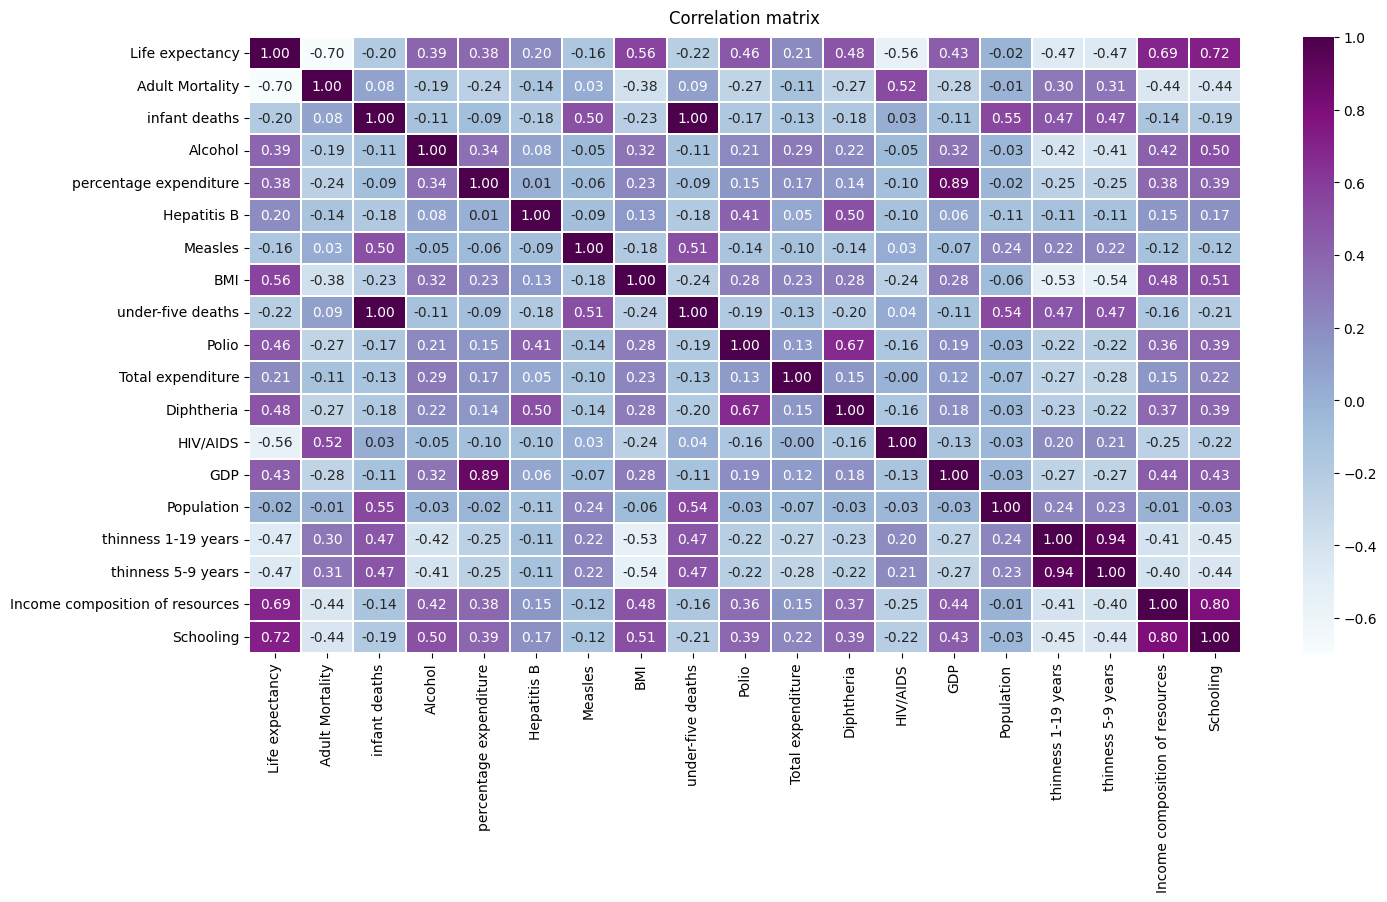

In [340]:
#изображаем и оцениваем корреляционную матрицу для всех значений
plt.figure(figsize = (16,8))
heatMap = sns.heatmap(data.select_dtypes(exclude = object).drop('Year', axis=1).corr(),
            annot = True, fmt = ".2f", linewidths = 0.2,cmap='BuPu')
heatMap.set_title('Correlation matrix', pad=10)
plt.show()

# Data Preprocessing

In [341]:
# подгружаем библиотеки
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,r2_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

In [342]:
# дилим данные на тренировочную и тестовую выборку в отношении 8-2
train, test =  train_test_split(data, test_size = 0.2, random_state = 42)

In [343]:
# размеры разбитых частей (тренировочной и тестовой)
print(train.shape, test.shape)

(2350, 22) (588, 22)


In [344]:
# используя labelEnconder (так как нам важен только тип а не порядок), переводим
encoder = LabelEncoder()
for column in ["Country", "Status"]:
    train[column] = encoder.fit_transform(train[column])
    test[column] = encoder.fit_transform(test[column])


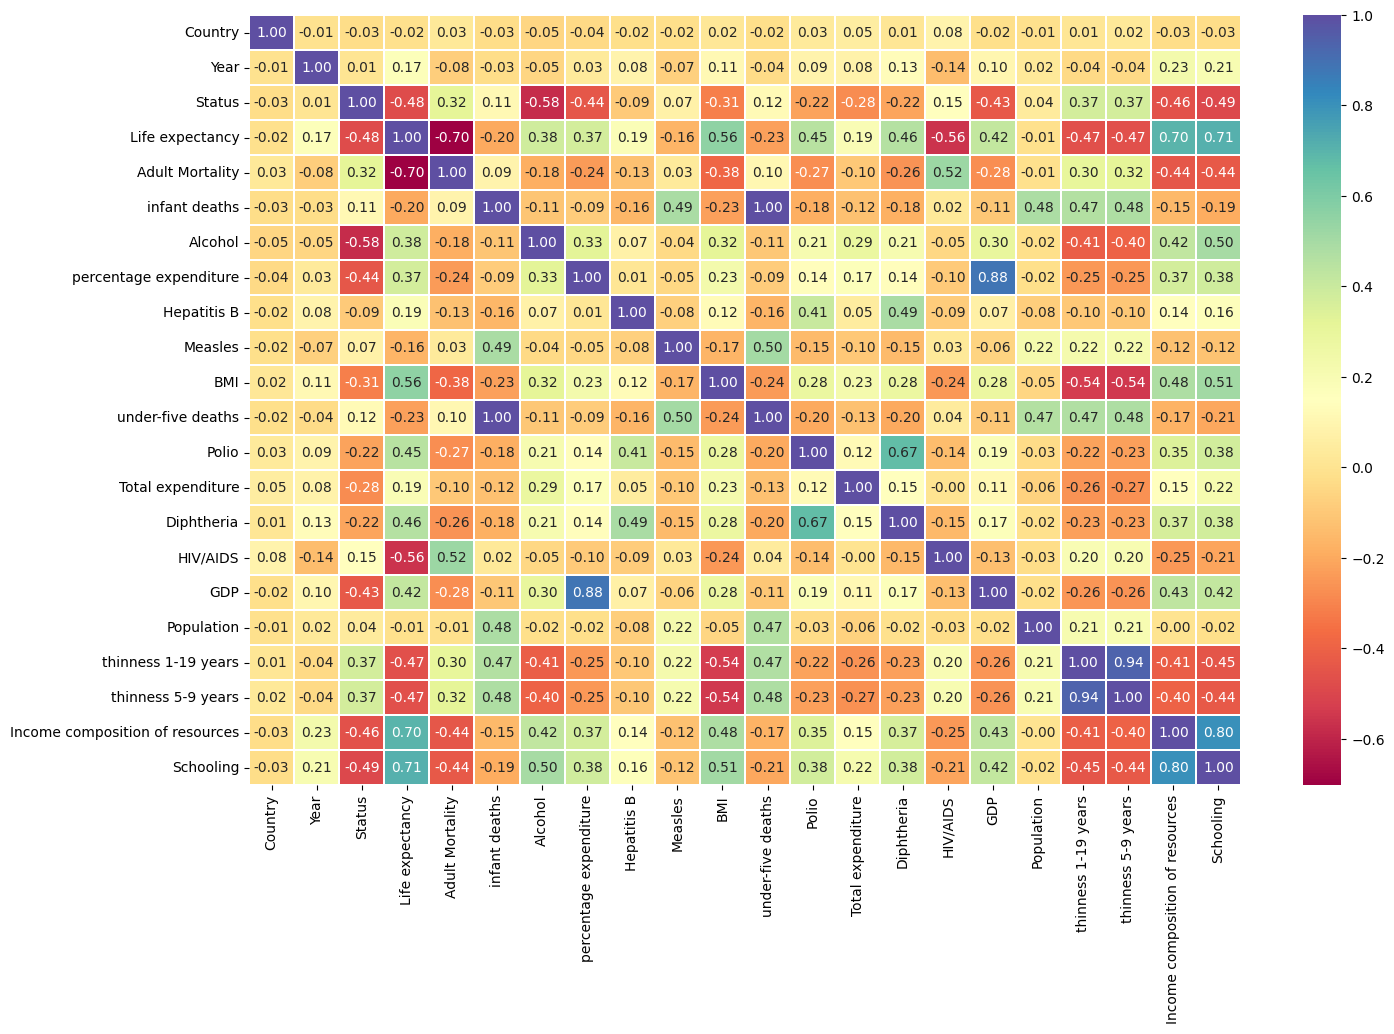

In [345]:
# Строим корреляционную матрицу для всех параметров
plt.figure(figsize = (16,10))
sns.heatmap(train.corr(), annot = True, fmt = ".2f", linewidths = 0.2,cmap='Spectral')
plt.show()

In [346]:
#проверяем значения тренировочной выборки
train.head()

Country  Year  Status  Life expectancy  Adult Mortality  infant deaths  \
456        27  2007       1             72.3            126.0              0   
462        27  2001       1             73.0            152.0              0   
2172      143  2011       1             74.6            143.0              0   
2667      174  2013       1             74.9             13.0              3   
381        23  2002       1             74.8             95.0              0   

      Alcohol  percentage expenditure  Hepatitis B  Measles  ...  Polio  \
456      5.28              345.463714    96.000000        0  ...   98.0   
462      3.81              150.743486    80.940461        0  ...   91.0   
2172    10.43                0.000000    99.000000        0  ...   99.0   
2667     1.29              594.645310    98.000000       16  ...   98.0   
381      0.13              941.703687    99.000000        0  ...   99.0   

      Total expenditure  Diphtheria  HIV/AIDS           GDP    Population  \
456                4.30        98.0       0.6   3112.285712  4.864380e+05   
462                5.19         9.0       0.8   1268.884564  4.437160e+05   
2172               7.58        99.0       0.1   7483.158469  1.275338e+07   
2667               7.26        98.0       0.1   4199.472530  1.114558e+06   
381                3.40        94.0       0.1  16846.219800  1.275338e+07   

      thinness 1-19 years  thinness 5-9 years  \
456                   8.1                 8.0   
462                   9.4                 9.3   
2172                  4.3                 4.3   
2667                  6.4                 6.3   
381                   6.7                 6.1   

      Income composition of resources  Schooling  
456                             0.602       11.9  
462                             0.562       11.0  
2172                            0.733       12.9  
2667                            0.720       14.7  
381                             0.820       13.3  

[5 rows x 22 columns]

In [347]:
#проверяем значения тестовой выборки
test.head()

Country  Year  Status  Life expectancy  Adult Mortality  infant deaths  \
2546      155  2006       1             73.7            123.0              8   
650        37  2006       0             75.9            113.0              0   
1740      105  2007       1             74.2            125.0              0   
177        11  2014       1             76.8              7.0              0   
1377       82  2000       1             51.9            428.0             77   

      Alcohol  percentage expenditure  Hepatitis B  Measles  ...  Polio  \
2546     0.97              122.652333    83.000000      517  ...   83.0   
650     11.83             1555.651986    80.940461        1  ...   96.0   
1740     4.98              678.518894     9.000000        0  ...   92.0   
177      1.57              367.255674    98.000000       46  ...   98.0   
1377     1.51                0.681686    80.940461    21002  ...    8.0   

      Total expenditure  Diphtheria  HIV/AIDS           GDP    Population  \
2546               3.78         8.0       0.1   1762.246170  1.891498e+07   
650                6.95        96.0       0.1  11363.418450  4.440000e+02   
1740               6.74        92.0       0.1   5957.145693  6.158750e+05   
177                4.98        98.0       0.1  24983.379200  1.275338e+07   
1377               4.68        82.0      18.1     43.979713  3.145483e+06   

      thinness 1-19 years  thinness 5-9 years  \
2546                  6.4                 6.3   
650                   1.8                 1.8   
1740                  2.1                 2.2   
177                   6.1                 6.0   
1377                  9.2                 9.1   

      Income composition of resources  Schooling  
2546                            0.636       11.4  
650                             0.783       13.9  
1740                            0.762       13.6  
177                             0.820       14.5  
1377                            0.448        8.4  

[5 rows x 22 columns]

# Building a model

In [348]:
# Разделение обучения на независимую и зависимую переменную

# Train = train[['Status', 'Adult Mortality', 'Alcohol', 'percentage expenditure', 'Polio', 'under-five deaths', 'Income composition of resources',
#               'HIV/AIDS' ]]
Train = train[['Year', 'Status', 'Adult Mortality', 'Alcohol', 'Hepatitis B', 'Measles', 'BMI',
               'under-five deaths', 'Polio', 'Total expenditure', 'HIV/AIDS','GDP',
               'thinness 1-19 years', 'Schooling']]
Target = train["Life expectancy"]

In [349]:
# Разделение тестирования на независимую и зависимую переменную

x_test = test[['Year', 'Status', 'Adult Mortality', 'Alcohol', 'Hepatitis B', 'Measles', 'BMI',
               'under-five deaths', 'Polio', 'Total expenditure', 'HIV/AIDS','GDP',
               'thinness 1-19 years', 'Schooling']]
y_test = test["Life expectancy"]

In [350]:
# Применяем масштабирование данных к независимым переменным (minMax)

scaler = MinMaxScaler()

Train = scaler.fit_transform(Train)
x_test= scaler.transform(x_test)

In [351]:
# пустой датафрейм для моделирования
Modeling = pd.DataFrame(columns=['Model', 'Training Score', 'Test R2 Score'])

# функция выбора модели
def select_model(model_name):
    global Modeling  # Access the global DataFrame

    # инициализация модели
    model = model_name

    # обучение модели на тренировочных данных
    model.fit(Train, Target)

    # Рассчитайте оценку модели на тренировочных данных
    train_score = model.score(Train, Target)
    print(f"Score of the {model_name} model on the training data is: {train_score}")

    # прогноз на основе тестовых данных
    predictions = np.round(model.predict(x_test), decimals = 1)

    # оценка R^2 для тестовых данных
    test_r2_score = r2_score(y_test, predictions)
    print(f"R2 score of the {model_name} model on the test data is: {test_r2_score}")

    model_scores = pd.DataFrame({'Model': [model_name], 'Training Score': [train_score], 'Test R2 Score': [test_r2_score]})

    # Объедините фрейм данных model_scores с фреймом данных моделирования
    Modeling = pd.concat([Modeling, model_scores], ignore_index = True)

In [352]:
#применение функции для модели Линейной регрес.
select_model(LinearRegression())

Score of the LinearRegression() model on the training data is: 0.7952977827768264
R2 score of the LinearRegression() model on the test data is: 0.8010472509274107


In [353]:
#применение функции для модели K-ближайших соседей
select_model(KNeighborsRegressor(n_neighbors = 5))

Score of the KNeighborsRegressor() model on the training data is: 0.9254778732635724
R2 score of the KNeighborsRegressor() model on the test data is: 0.8979645785791343


In [354]:
#применение функции для модели случайного леса
select_model(RandomForestRegressor(n_estimators = 100, max_depth=8, min_samples_split=5))

Score of the RandomForestRegressor(max_depth=8, min_samples_split=5) model on the training data is: 0.9749997275163175
R2 score of the RandomForestRegressor(max_depth=8, min_samples_split=5) model on the test data is: 0.9573621729203069


In [355]:
# переминовываем модели
names = ['LinearRegression', 'KNeighborsRegressor', 'RandomForestRegressor']

# loop over list to rename model
for i in range(3):
    Modeling.rename(index = {i : names[i]}, inplace = True)

# drop model column
Modeling.drop(columns= "Model", inplace = True)

In [356]:
# строим диаграмму оценки работы моделей
fig = px.bar(
    Modeling,
    x = Modeling.index,
    y = Modeling.columns,
)
fig.update_layout(
    bargap=0.3,
    title="Сравнение моделий",
)

fig.update_xaxes(title_text='')
fig.update_yaxes(title_text='')

fig.show()